## Import Libraries and Dataset

Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [4]:
df = pd.read_csv('regression_geologic_dataset.csv')

Read the first 5 rows using `head` method





In [5]:
df.head()

,porosity,matrixperm,acousticimpedance,brittlenessratio,toc,vitrinitereflectance,productivitymetric
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


## Exploratory Data Analysis

Describe **statistical information** of dataset using `describe` method. Describe method is very handy in getting various summary statistics. This method returns the count, mean and standard deviation, minimum and maximum values and the quantiles of the data.

Also, since we have a lot of features, we can use `transpose` method to visualize the table better.

In [6]:
df.describe()

,porosity,matrixperm,acousticimpedance,brittlenessratio,toc,vitrinitereflectance,productivitymetric
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


We can also use `info` method to know the column, data types, and count of non-null data points.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   porosity              200 non-null    float64
 1   matrixperm            200 non-null    int64  
 2   acousticimpedance     200 non-null    float64
 3   brittlenessratio      200 non-null    float64
 4   toc                   200 non-null    float64
 5   vitrinitereflectance  200 non-null    float64
 6   productivitymetric    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


### Univariate data analysis

**Univariate data analysis** can also be described using graphical tools such as 
* Histogram (using `distplot`, `displot` for a figure-level, or `histplot` for axes-level function from seaborn)
* Box plot (using `boxplot` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_62526/2997311483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['matrixperm'])


<Axes: xlabel='matrixperm', ylabel='Density'>

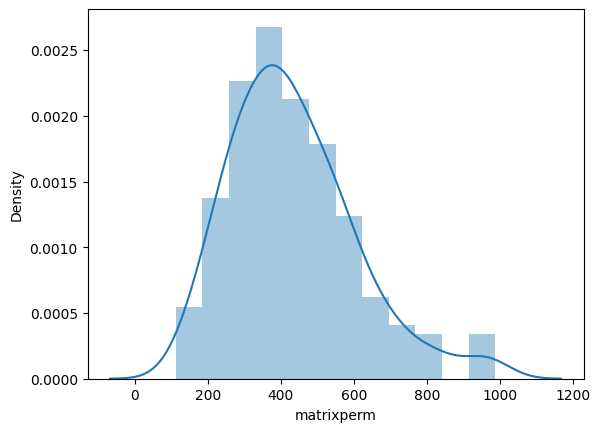

In [8]:
sns.distplot(df['matrixperm'])

We can also visualize the boxplots and histograms altogether **in a single figure** by using `subplots` method from `matplotlib.pyplot` libraries

<Axes: >

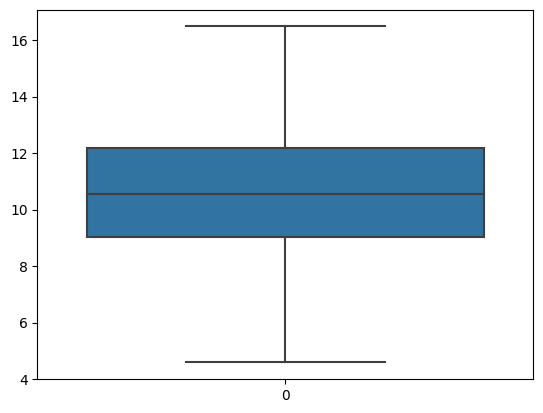

In [9]:
sns.boxplot(df['porosity'])

### Multi-variate data analysis

Often time, we are interested in the **interaction between data feature**. Thus, we will perform multi-variate data exploration, such as:
* Scatter plot (using `scatterplot` from seaborn) to visualize correlation between each independent variables with dependent variable
* Pair plot (using `pairplot` from seaborn)
* Correlation matrix (using `corr` method from pandas)
* Heat map (using `heatmap` from seaborn)

<Axes: xlabel='brittlenessratio', ylabel='productivitymetric'>

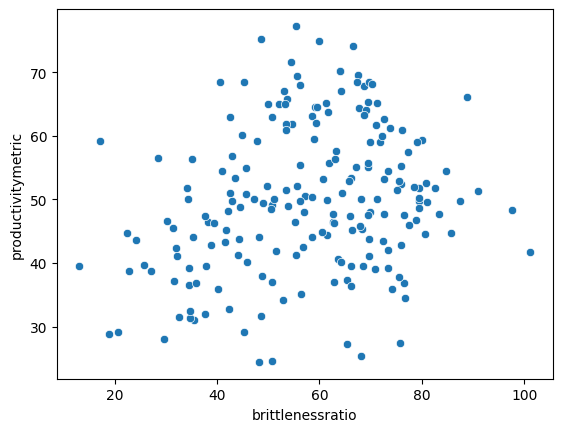

In [10]:
sns.scatterplot(data=df, x="brittlenessratio", y="productivitymetric")

In [11]:
# sns.pairplot(df)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [12]:
df.corr(method='pearson')

,porosity,matrixperm,acousticimpedance,brittlenessratio,toc,vitrinitereflectance,productivitymetric
porosity,1.000000,0.760546,-0.461549,-0.218570,0.710718,0.111860,0.861910
matrixperm,0.760546,1.000000,-0.239636,-0.124017,0.472598,0.051023,0.727426
acousticimpedance,-0.461549,-0.239636,1.000000,0.127599,-0.529581,0.499143,-0.390835
brittlenessratio,-0.218570,-0.124017,0.127599,1.000000,-0.212520,0.317929,0.237155
toc,0.710718,0.472598,-0.529581,-0.212520,1.000000,0.300523,0.654632
vitrinitereflectance,0.111860,0.051023,0.499143,0.317929,0.300523,1.000000,0.323182
productivitymetric,0.861910,0.727426,-0.390835,0.237155,0.654632,0.323182,1.000000


Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

<Axes: >

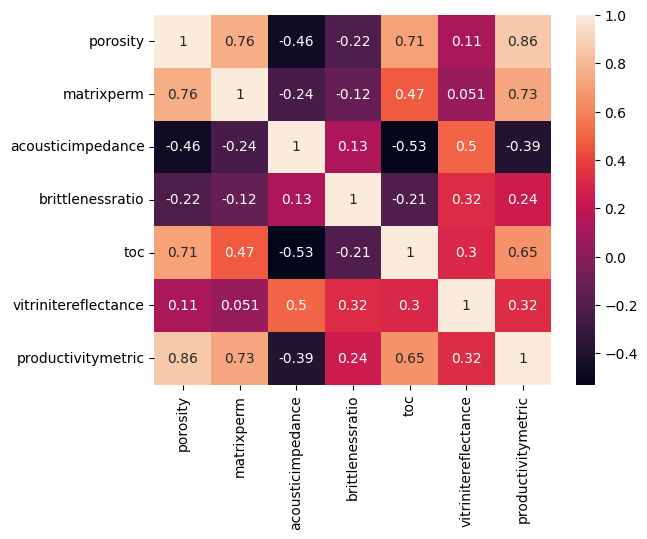

In [13]:
sns.heatmap(df.corr(method='pearson'), annot=True)

### Addressing multi co-linearity problem

Based on the heat map above we can see that:
* Productivity metric (dependent variable) is strongly correlated with porosity, matrix permeability, and TOC
* Porosity, matrix permeability, and TOC are strongly correlated with each others. Thus, indicating collinear independent variables.

Literature study:
* TOC content has linear relations with density logging and gamma-ray logging.
* Porosity and permeability are related to each other from petrophysical correlation

Therefore, we will drop two out of three potentially collinear independent variables:
* Total Organic Carbon (TOC)
* Matrix Permeability

Use `drop` method from pandas with `inplace=True` to reuse the `df` and permanently drop those two features

In [14]:
df.drop(labels=['toc', 'matrixperm'], axis=1, inplace=True)
df

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance,productivitymetric
0,8.456,3.080,97.680,1.848,48.306469
1,8.666,3.542,55.404,1.504,41.300912
2,9.814,4.411,87.360,2.176,49.688356
3,12.369,2.893,47.772,1.504,59.132694
4,12.264,3.498,13.128,1.520,39.503121
...,...,...,...,...,...
195,8.365,3.267,80.616,1.648,44.622765
196,12.593,3.718,53.184,1.664,64.961047
197,8.484,3.872,68.484,1.384,39.543047
198,10.885,2.728,69.900,1.880,59.004091


Now let's make sure that no co-linear independent variables using heatmap 

<Axes: >

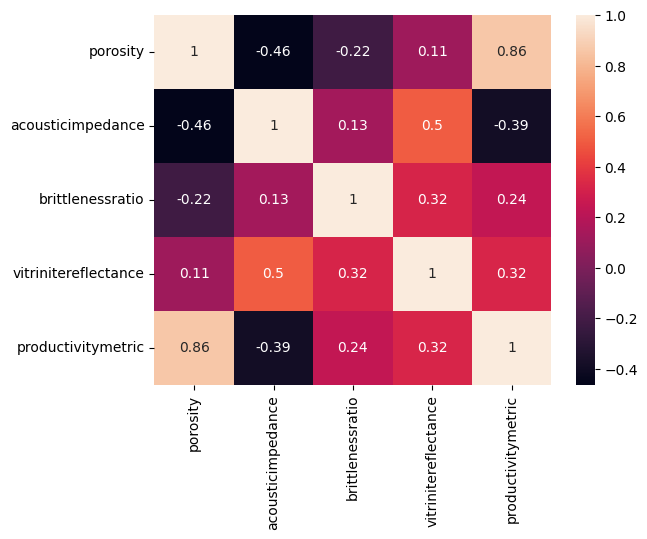

In [15]:
sns.heatmap(df.corr(method="pearson"), annot=True)

## Data Preprocessing

### Creating feature matrix and output matrix

Here, we will create two matrices:
* `X` data frame consisting feature (independent variable) columns
* `y` data frame consist of dependent variable (last column in `df` data frame) 

In [16]:
X = df.drop(labels=['productivitymetric'], axis=1)
y = df['productivitymetric']

In [17]:
X

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
0,8.456,3.080,97.680,1.848
1,8.666,3.542,55.404,1.504
2,9.814,4.411,87.360,2.176
3,12.369,2.893,47.772,1.504
4,12.264,3.498,13.128,1.520
...,...,...,...,...
195,8.365,3.267,80.616,1.648
196,12.593,3.718,53.184,1.664
197,8.484,3.872,68.484,1.384
198,10.885,2.728,69.900,1.880


In [18]:
y

0      48.306469
1      41.300912
2      49.688356
3      59.132694
4      39.503121
         ...    
195    44.622765
196    64.961047
197    39.543047
198    59.004091
199    77.270733
Name: productivitymetric, Length: 200, dtype: float64

### Splitting the dataset into the Training set and Test set

Here we can use `train_test_split` method of `model_selection` module from `sklearn` library. At this step, we will have 4 (four) new dataframe:
* `X_train`
* `X_test`
* `y_train`
* `y_test`

Given that the `test_size` is 0.2 (or 20% of our original dataset will be used as test set)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
108,14.602,2.783,48.684,1.944
107,12.019,2.585,45.696,1.576
189,11.284,2.662,43.008,1.472
14,9.681,2.761,79.464,1.312
56,9.569,3.179,34.428,1.384
...,...,...,...,...
133,13.153,3.927,42.888,1.840
137,10.283,2.629,75.516,1.544
72,10.395,3.993,53.916,1.640
140,13.125,1.595,69.660,1.240


In [21]:
X_test

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
58,11.270,2.376,32.124,1.032
40,10.059,3.278,57.144,1.496
34,8.232,4.598,73.452,1.960
102,7.350,4.059,73.308,1.736
184,12.649,3.179,34.404,1.680
198,10.885,2.728,69.900,1.880
95,12.572,3.157,59.292,1.608
4,12.264,3.498,13.128,1.520
29,9.023,3.190,61.488,1.576
168,13.272,2.387,35.136,1.560


In [22]:
X_train.describe()

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
count,160.000000,160.000000,160.000000,160.000000
mean,10.441506,3.248919,58.814700,1.575550
std,2.131697,0.623437,16.401219,0.237698
min,4.585000,1.408000,17.088000,0.920000
25%,9.049250,2.802250,48.288000,1.404000
50%,10.538500,3.228500,61.530000,1.572000
75%,12.078500,3.638250,70.395000,1.714000
max,16.485000,5.093000,101.196000,2.296000


In [23]:
y_train

108    75.154377
107    54.902856
189    49.773646
14     50.143215
56     36.492318
         ...    
133    56.786676
137    52.959498
72     48.948525
140    68.465289
37     60.883297
Name: productivitymetric, Length: 160, dtype: float64

In [24]:
X_test.describe()

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
count,40.000000,40.000000,40.000000,40.000000
mean,10.703000,3.333000,53.712900,1.555000
std,1.868104,0.627462,18.677673,0.254629
min,7.350000,2.013000,13.128000,0.744000
25%,9.038750,2.802250,38.133000,1.464000
50%,10.769500,3.311000,54.768000,1.560000
75%,12.222000,3.830750,69.006000,1.696000
max,14.672000,4.598000,90.876000,2.080000


### Feature Scaling



Feature scaling can be performed using `preprocessing` module from `sklearn`. In general, there are two types of feature scaling:
* Standardization (using `StandardScaler` class)
* Normalization (using `MinMaxScaler` class) 

Here, we will use standardization feature scaling using `StandardScaler` class described as below
* `sc` is an instance of `StandardScaler` class. Also known as "scaler"
* `fit` method will determine the mean and standard deviation of `X_train` data
* a new Numpy array of `X_train_scaled` will be created by transforming `X_train` data frame based on scaler `sc` using `transform` method 

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# let's allow sc to see our X_train data, and determine mean and sd during learning
sc.fit(X_train)

# let's use the mean and sd learned by sc to transform our data
X_train_scaled = sc.transform(X_train)

X_train_scaled

array([[ 1.95785679e+00, -7.49685246e-01, -6.19619049e-01,
         1.55494039e+00],
       [ 7.42341423e-01, -1.06827659e+00, -8.02372632e-01,
         1.89909941e-03],
       [ 3.96463066e-01, -9.44379954e-01, -9.66777461e-01,
        -4.37003875e-01],
       [-3.57881159e-01, -7.85084284e-01,  1.26296304e+00,
        -1.11223922e+00],
       [-4.10586432e-01, -1.12502567e-01, -1.49155181e+00,
        -8.08383314e-01],
       [-8.05875983e-01,  1.03796616e+00, -1.41101913e-02,
         1.92631983e+00],
       [ 1.52303828e+00,  4.89281075e-01, -8.52281241e-01,
        -5.72050944e-01],
       [-1.24001508e-01, -1.61696167e+00,  1.26663279e+00,
        -1.11223922e+00],
       [ 2.51523564e-01,  1.44505509e+00,  6.48646777e-01,
         1.28484625e+00],
       [ 2.84396420e+00, -2.96212510e+00, -2.55210974e+00,
        -2.46270991e+00],
       [-9.90344440e-01, -1.20987274e+00, -1.19799010e-01,
        -1.34857159e+00],
       [-3.80939716e-01,  8.96370009e-01,  2.45708155e-01,
      

In [26]:
X_train.columns

Index(['porosity', 'acousticimpedance', 'brittlenessratio',
       'vitrinitereflectance'],
      dtype='object')

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['porosity', 'acousticimpedance', 'brittlenessratio', 'vitrinitereflectance'])
X_train_scaled.describe()

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,9.992007e-17,-1.720846e-16,3.275158e-16,-2.220446e-17
std,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-2.755971e+00,-2.962125e+00,-2.552110e+00,-2.766566e+00
25%,-6.551718e-01,-7.187111e-01,-6.438394e-01,-7.239789e-01
50%,4.564359e-02,-3.285473e-02,1.660746e-01,-1.498178e-02
75%,7.703411e-01,6.264523e-01,7.082802e-01,5.842896e-01
max,2.843964e+00,2.967214e+00,2.592147e+00,3.040458e+00


In [28]:
X_test_scaled = sc.transform(X_test)

Because we love to work with data frame format, here we will create new data frame for scaled data:
* X_train_scaled
* X_test_scaled

In [29]:
X.columns

Index(['porosity', 'acousticimpedance', 'brittlenessratio',
       'vitrinitereflectance'],
      dtype='object')

In [30]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [31]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
0,0.389875,-1.404567,-1.632470,-2.293901
1,-0.180001,0.046793,-0.102184,-0.335719
2,-1.039756,2.170735,0.895254,1.622464
3,-1.454810,1.303459,0.886447,0.677134
4,1.038809,-0.112503,-1.493020,0.440802
5,0.208701,-0.838183,0.678005,1.284846
6,1.002574,-0.147902,0.029193,0.136946
7,0.857634,0.400783,-2.794313,-0.234433
8,-0.667525,-0.094803,0.163506,0.001899
9,1.331982,-1.386868,-1.448249,-0.065624


We can visually compare the data before and after Feature Scaling process to understand the process. Pandas provide `plot` method to display box plot visualization

1. Display the box-plot of original dataset of training set (`X`). It is apparent that each feature have different scale.

<Axes: >

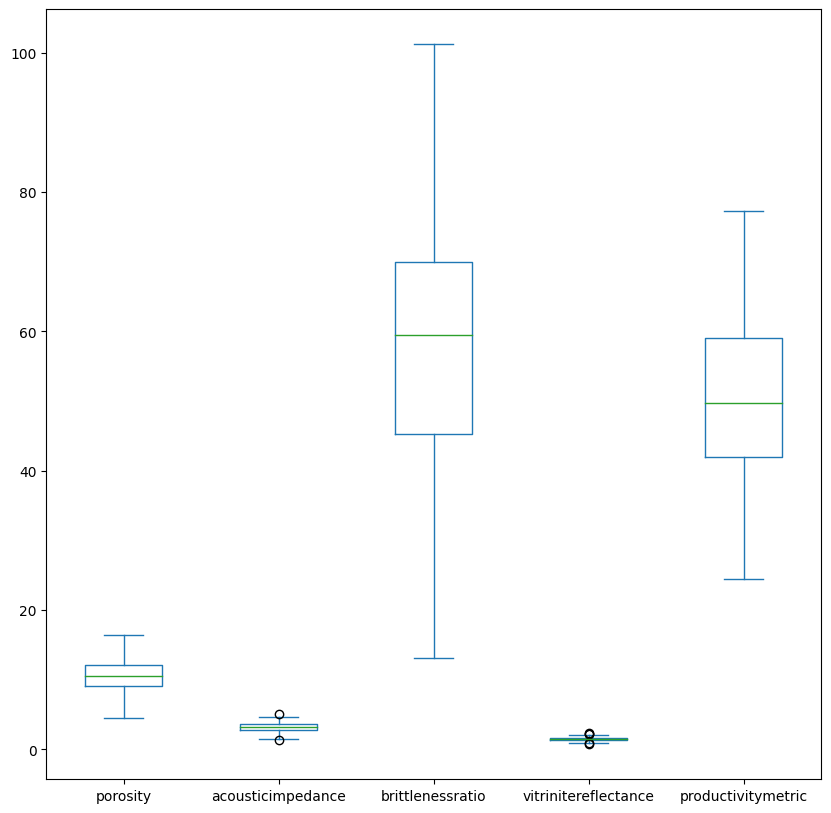

In [32]:
df.plot(kind='box', figsize=(10,10))

2. Display the box-plot of training set of Feature matrix (`X_train`) after Feature Scaling process.

<Axes: >

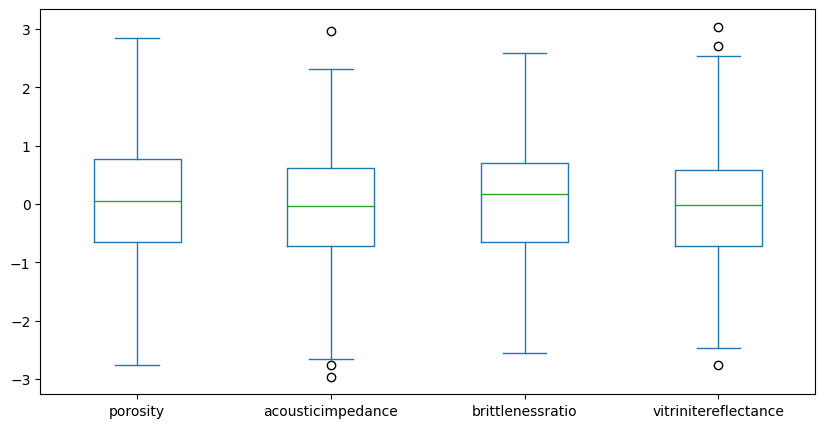

In [33]:
X_train_scaled.plot(kind='box', figsize=(10, 5))

In [34]:
sc.mean_

array([10.44150625,  3.24891875, 58.8147    ,  1.57555   ])

3. Display the box-plot of training set of Feature matrix (`X_test`) after Feature Scaling process.

<Axes: >

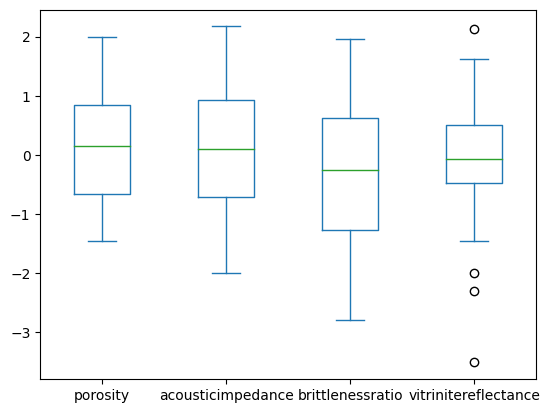

In [35]:
X_test_scaled.plot(kind='box')

Why do we perform feature scaling after splitting the dataset into training and test set?

* It is a good practice to fit the scaler on the training set then use it to transform the testing data. This would avoid any **data leakage** during the model testing process
* The scaling of target values (dependent variable) is generally **not required**
* If you're unsure whether your should perform feature scaling or not, or which scaling method to use, you can always **compare the performance** for the best results

## Training the Multiple Linear Regression Model on the Training Set

Training the model can be performed in three simple step:
*   Import `LinearRegression` class from `linear_model` modul of `sklearn`
*   Create the model as an instance of `LinearRegression` class. Example name: `regressor`
* Train the model using `fit` method on the training set (`X_train_scaled` and `y_train`). **Remember!** Use the dataset after feature scaling step for feature matrix.

In [36]:
from sklearn.linear_model import LinearRegression

# create model named regressor
regressor = LinearRegression()

# train the model
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation

Model evaluation can be performed on:
* Overall dataset
* Training set 
* Test set

**IMPORTANT!** Comparing model performance on both Training Set and Test Set provide qualitative information about **bias-variance trade off** of the model. 

### Model Evaluation on Training Set

Now that our model named `regressor` is ready, we can predict the value of dependent variable `productivitymetric`.
* `predict` method to return the output of the model
* Here we will try to predict using feature from training set `X_train_scaled`
* The output will be stored in variable `y_pred_train` 

In [37]:
y_pred_train = regressor.predict(X_train_scaled)

We can plot the comparison of the output predicted by our model `y_pred_train` with the actual value `y_train` in a simple scatter plot. It is also very useful to provide **diagonal line** that represent "perfect model" when prediction result is identival to actual output. 

Text(0.5, 1.0, 'using training set')

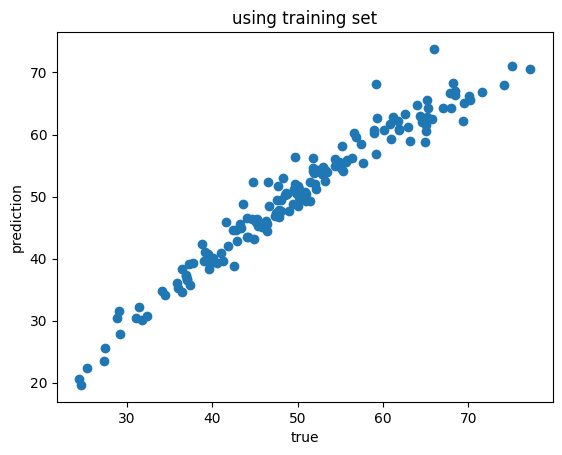

In [38]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using training set')

**How do we quantify the accuracy of our regression model?**

While graphical result as shown above provide insights that our regression model is quite satisfactory, it will be useful if we can describe the regression performance numerically. This is called the **regression metric**, those are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Coefficient of determination ($R^2$)

In [39]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.9486635329300181

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train, squared=False)

2.6051847340113587

### Model Evaluation on Testing Set

In [41]:
y_pred_test = regressor.predict(X_test_scaled)

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.928971831308557

In [43]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test, squared=False)

3.028830814065732

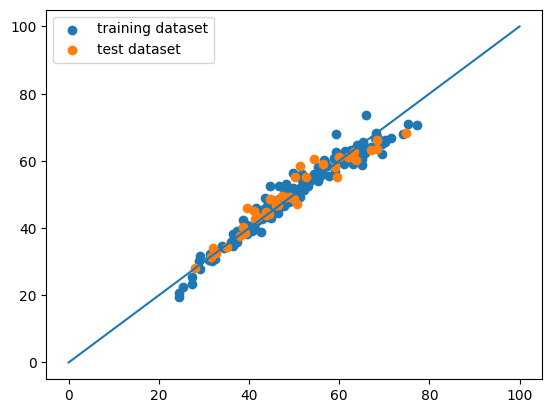

In [44]:
plt.scatter(y_train, y_pred_train, label="training dataset")
plt.scatter(y_test, y_pred_test, label="test dataset")
plt.plot([0,100], [0,100])
plt.legend()

### Model Evaluation on Overall Data Set

# Result Interpretation

## Model Coefficients

Recall the mathematical formula for Multiple Linear Regression:
$$ y_{\text{predict}}=a_0+a_1 * x_{\text{porosity}}+a_2 * x_{\text{acoustic impedance}}+a_3 * x_{\text{brittleness ratio}}+a_1 * x_{\text{vitrinite reflectance}}$$

Determine intercept coefficient $a_0$ using `intercept_` method

In [45]:
regressor.intercept_

50.168843328499996

List the coefficients for each independent variables (i.e. $a_1$, $a_2$, $a_3$, $a_4$) using `coef_` method

In [46]:
regressor.coef_

array([10.31840982, -1.19108816,  4.35520067,  1.55888733])

**IMPORTANT!** 
* In linear regression, the value of the coefficients provide insight about which feature affect the model prediction the most (i.e. the feature importance). Here, the productivity metric is strongly affected by porosity.
* The sign of the coefficient shows whether the independent variable proportional or inversely proportional to predicted output
* Coefficient displayed are to be used in 'standardized' input using `sc` scaler declared in previous section

## Prediction using The Model

Input features using the same unit of original data set

In [47]:
input_porosity = 20
input_acousticimpedance = 4
input_brittlenessratio = 30
input_vitrinitereflectance = 1.2

Convert input features as `numpy` 2D array

In [48]:
input = np.array([input_porosity, 
                  input_acousticimpedance, 
                  input_brittlenessratio, 
                  input_vitrinitereflectance]).reshape(1,-1)
input

array([[20. ,  4. , 30. ,  1.2]])

In [49]:
np.ndim(input)

2

Use `predict` method from our model `regressor`, but don't forget to `transform` the feature input using our scaler `sc`

In [50]:
output = regressor.predict(sc.transform(input))
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.99603534])

##Cross-Validation

In [51]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=regressor, X=X_train_scaled, y=y_train, cv=5)

array([0.9422131 , 0.92413641, 0.92015078, 0.97251069, 0.95617484])

# Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= regressor, X= X_train_scaled, y= y_train, cv= 10)
scores

array([0.91536167, 0.95641948, 0.91170903, 0.92459342, 0.92080223,
       0.91511882, 0.97517961, 0.96901824, 0.94717503, 0.96213434])

In [53]:
np.mean(scores)

0.9397511864956674

In [54]:
np.std(scores)

0.023499938162323986